In [49]:
#import the pandas module
import pandas as pd
#import the numpy module
import numpy as np

colnames=['JSON ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Speaker job title', 'state info', 'party affiliation', 'barely true count', 'false count', 'half true counts', 'mostly true counts','pants on fire counts', 'context', 'justification'] 


In [50]:
#Reading and exploring the data by coverting to pandas dataframe


#train2.tsv
train2 = pd.read_csv('/Users/gayatrisridhar/Desktop/LIAR-PLUS-master/dataset/train2.tsv', names = colnames, sep="\t", engine='python')
print(list(train2.columns.values)) #file header
print(train2.tail(35)) #last N rows
print(train2.head(30)) #first N records

#test2.tsv
test2=pd.read_csv('/Users/gayatrisridhar/Desktop/LIAR-PLUS-master/dataset/test2.tsv', names = colnames, sep="\t", engine='python')
print(list(test2.columns.values)) #file header
print(test2.tail(35)) #last N rows
print(test2.head(30)) #first N records



#validation.tsv
val2 = pd.read_csv('/Users/gayatrisridhar/Desktop/LIAR-PLUS-master/dataset/val2.tsv', names = colnames, sep="\t", engine='python')
print(list(val2.columns.values)) #file header
print(val2.tail(5)) #last N rows


['JSON ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Speaker job title', 'state info', 'party affiliation', 'barely true count', 'false count', 'half true counts', 'mostly true counts', 'pants on fire counts', 'context', 'justification']
          JSON ID        Label  \
10205    133.json         true   
10206   7652.json   pants-fire   
10207   6178.json        false   
10208   6339.json    half-true   
10209   1729.json    half-true   
10210   8119.json         true   
10211   1550.json         true   
10212   4077.json    half-true   
10213  11207.json  barely-true   
10214   4216.json        false   
10215   9365.json  barely-true   
10216    981.json        false   
10217  11074.json    half-true   
10218   1674.json        false   
10219   6032.json    half-true   
10220   7388.json  mostly-true   
10221  10166.json        false   
10222   8371.json         true   
10223   3744.json  mostly-true   
10224   8262.json  barely-true   
10225   1918.json    half-true   
10226   46

In [51]:
#preprocess the text in train2: Tokenize if needed, lower, remove np.nan, remove .json from first coloumn, vectorize or encode strings, remove columns with strings

train2.dropna(inplace =True) #Return DataFrame with labels on given axis omitted where (all or any) data are missing.
train2.fillna(" ") #replacing the NaN values with space

train2.head()


,JSON ID,Label,Statement,Subject,Speaker,Speaker job title,state info,party affiliation,barely true count,false count,half true counts,mostly true counts,pants on fire counts,context,justification
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.","However, it was not that bill, but another one..."


In [66]:
#Tf-ID vectorization for train2.tsv

from sklearn.feature_extraction.text import TfidfVectorizer 
v = TfidfVectorizer()
train2['SpeakerVect'] = list(v.fit_transform(train2['Speaker']).toarray())

x = v.fit_transform(train2['Statement'])
train2['StatementVect'] = list(v.fit_transform(train2['Statement']).toarray())

x = v.fit_transform(train2['Speaker job title'])
train2['Speaker job title Vect'] = list(v.fit_transform(train2['Speaker job title']).toarray())

x = v.fit_transform(train2['party affiliation'])
train2['party affiliation Vect'] = list(v.fit_transform(train2['party affiliation']).toarray())

x = v.fit_transform(train2['context'])
train2['contextVect'] = list(v.fit_transform(train2['context']).toarray())

x = v.fit_transform(train2['Subject'])
train2['SubjectVect'] = list(v.fit_transform(train2['Subject']).toarray())

x = v.fit_transform(train2['justification'])
train2['justficationVect'] = list(v.fit_transform(train2['justification']).toarray())



train2.head()

,JSON ID,Label,Statement,Subject,Speaker,Speaker job title,state info,party affiliation,barely true count,false count,...,pants on fire counts,context,justification,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,justficationVect
0,2654,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.0,a mailer,That's a premise that he fails to back up. Ann...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,277,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.0,a floor speech.,"Surovell said the decline of coal ""started whe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.5108920696084539, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3028,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,9.0,Denver,Obama said he would have voted against the ame...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,1337,5,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,...,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,2065,2,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,...,9.0,"a Democratic debate in Philadelphia, Pa.","However, it was not that bill, but another one...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [70]:
#label encoding to convert the TFID columns into int for the train2.tsv file
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train2['JSON ID']= le.fit_transform(train2['JSON ID'])
train2['Label'] = le.fit_transform(train2['Label'])
train2['StatementVect']= le.fit_transform(train2['Statement'])
train2['SubjectVect']= le.fit_transform(train2['Subject'])
train2['SpeakerVect']= le.fit_transform(train2['Speaker'])
train2['Speaker job title Vect']= le.fit_transform(train2['Speaker job title'])
train2['state info Vect']= le.fit_transform(train2['state info'])
train2['party affiliation Vect']= le.fit_transform(train2['party affiliation'])
train2['contextVect']= le.fit_transform(train2['context'])
train2['justificationVect']= le.fit_transform(train2['justification'])



train2.head(8)

,JSON ID,Label,Statement,Subject,Speaker,Speaker job title,state info,party affiliation,barely true count,false count,...,justification,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,justficationVect,state info Vect,justificationVect
0,2654,1,Says the Annies List political group supports ...,16,438,712,56,16,0.0,1.0,...,5120,438,4321,712,16,937,16,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56,5120
1,277,2,When did the decline of coal start? It started...,1778,1397,710,63,4,0.0,0.0,...,5022,1397,6453,710,4,816,1778,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",63,5022
2,3028,3,"Hillary Clinton agrees with John McCain ""by vo...",1985,80,526,18,4,70.0,71.0,...,3717,80,1245,526,4,56,1985,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",18,3717
5,1337,5,The Chicago Bears have had more starting quart...,1607,1329,810,73,16,0.0,3.0,...,1070,1329,4939,810,16,517,1607,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",73,1070
7,2065,2,I'm the only person on this stage who has work...,1836,80,526,18,4,70.0,71.0,...,2560,80,1450,526,4,251,1836,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",18,2560
9,6561,3,Says GOP primary opponents Glenn Grothman and ...,1788,433,712,73,16,0.0,0.0,...,1696,433,3265,712,16,2353,1788,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",73,1696
10,5229,3,"For the first time in history, the share of th...",1690,1319,777,36,4,1.0,3.0,...,5715,1319,1040,777,4,1258,1690,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",36,5715
11,3607,2,"Since 2000, nearly 12 million Americans have s...",1522,103,777,60,8,18.0,12.0,...,4852,103,4630,777,8,1690,1522,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",60,4852


In [85]:

train2_new = train2.drop(['Statement', 'Subject', 'Speaker', 'Speaker job title', 'party affiliation', 'justification', 'justficationVect','context', 'state info'], axis=1)
train2_new.head()


,JSON ID,Label,barely true count,false count,half true counts,mostly true counts,pants on fire counts,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,state info Vect,justificationVect
0,2654,1,0.0,1.0,0.0,0.0,0.0,0.0,4321,712,16,0.0,16,56,0.0
1,277,2,0.0,0.0,1.0,1.0,0.0,0.0,6453,710,4,0.0,1778,63,0.0
2,3028,3,70.0,71.0,160.0,163.0,9.0,0.0,1245,526,4,0.0,1985,18,0.0
5,1337,5,0.0,3.0,2.0,5.0,1.0,0.0,4939,810,16,0.0,1607,73,0.0
7,2065,2,70.0,71.0,160.0,163.0,9.0,0.0,1450,526,4,0.0,1836,18,0.0


In [72]:
train2_new.dtypes

JSON ID                     int64
Label                       int64
state info                  int64
barely true count         float64
false count               float64
half true counts          float64
mostly true counts        float64
pants on fire counts      float64
SpeakerVect                 int64
StatementVect               int64
Speaker job title Vect      int64
party affiliation Vect      int64
contextVect                 int64
SubjectVect                 int64
state info Vect             int64
justificationVect           int64
dtype: object

In [86]:
#create one hot encoded values for the labels in train2.tsv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


ohe = preprocessing.OneHotEncoder()
train2_new['Label'] = ohe.fit_transform(train2.Label.values.reshape(-1,1)).toarray()

train2_new['StatementVect'] = ohe.fit_transform(train2_new.StatementVect.values.reshape(-1,1)).toarray()
train2_new['SpeakerVect'] = ohe.fit_transform(train2_new.SpeakerVect.values.reshape(-1,1)).toarray()
train2_new['contextVect'] = ohe.fit_transform(train2_new.contextVect.values.reshape(-1,1)).toarray()
train2_new['justificationVect'] = ohe.fit_transform(train2_new.justificationVect.values.reshape(-1,1)).toarray()

train2_new.head()

,JSON ID,Label,barely true count,false count,half true counts,mostly true counts,pants on fire counts,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,state info Vect,justificationVect
0,2654,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,712,16,1.0,16,56,1.0
1,277,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,710,4,1.0,1778,63,1.0
2,3028,0.0,70.0,71.0,160.0,163.0,9.0,1.0,0.0,526,4,1.0,1985,18,1.0
5,1337,0.0,0.0,3.0,2.0,5.0,1.0,1.0,0.0,810,16,1.0,1607,73,1.0
7,2065,0.0,70.0,71.0,160.0,163.0,9.0,1.0,0.0,526,4,1.0,1836,18,1.0


In [87]:
#splitting into train-test set for model training of the data from train2.tsv file
from sklearn.model_selection import train_test_split
y = train2_new.Label
X = train2_new.drop('Label', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      JSON ID  barely true count  false count  half true counts  \
8202     3947                2.0          3.0               3.0   
2105     1588                0.0          1.0               0.0   
9647     4123                1.0          0.0               1.0   
1351     4600                0.0          0.0               1.0   
4376     3641                1.0          0.0               0.0   

      mostly true counts  pants on fire counts  SpeakerVect  StatementVect  \
8202                 2.0                   0.0          1.0            0.0   
2105                 0.0                   0.0          1.0            0.0   
9647                 0.0                   0.0          1.0            0.0   
1351                 0.0                   0.0          1.0            0.0   
4376                 0.0                   0.0          1.0            0.0   

      Speaker job title Vect  party affiliation Vect  contextVect  \
8202                     777                    

In [88]:

#dropping nan values for the test2.tsv file
test2.dropna(inplace =True) #Return DataFrame with labels on given axis omitted where (all or any) data are missing.
test2.fillna(" ") #replacing the NaN values with space
test2.head()

,JSON ID,Label,Statement,Subject,Speaker,Speaker job title,state info,party affiliation,barely true count,false count,...,justification,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,justficationVect,state info Vect,justificationVect
0,123,5,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,"Meantime, engineering experts agree the wall w...",309,85,70,11,31,412,"[0.11715203578747037, 0.0, 0.0, 0.0, 0.0, 0.0,...",33,447
1,100,1,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,She cited layoff notices received by the state...,209,840,169,5,189,431,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",42,611
2,69,1,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,"Trump said that McCain ""has done nothing to he...",92,463,129,11,476,464,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",24,763
3,527,2,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,"But spending still goes up. In addition, many ...",312,625,223,11,243,453,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27,168
6,648,5,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0,0,...,Residents in those suburbs do not get a vote b...,346,567,32,9,503,158,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",32,561


In [89]:
#Tf-ID vectorization for test2.tsv file

from sklearn.feature_extraction.text import TfidfVectorizer 
v = TfidfVectorizer()
test2['SpeakerVect'] = list(v.fit_transform(test2['Speaker']).toarray())

x = v.fit_transform(test2['Statement'])
test2['StatementVect'] = list(v.fit_transform(test2['Statement']).toarray())

x = v.fit_transform(test2['Speaker job title'])
test2['Speaker job title Vect'] = list(v.fit_transform(test2['Speaker job title']).toarray())

x = v.fit_transform(test2['party affiliation'])
test2['party affiliation Vect'] = list(v.fit_transform(test2['party affiliation']).toarray())

x = v.fit_transform(test2['context'])
test2['contextVect'] = list(v.fit_transform(test2['context']).toarray())

x = v.fit_transform(test2['Subject'])
test2['SubjectVect'] = list(v.fit_transform(test2['Subject']).toarray())

x = v.fit_transform(test2['justification'])
test2['justficationVect'] = list(v.fit_transform(test2['justification']).toarray())

#droppping the unwanted textual columns
test2_new = test2.drop(['Statement', 'Subject', 'Speaker', 'Speaker job title', 'party affiliation', 'justification', 'justficationVect','context'], axis=1)
test2_new.head()


,JSON ID,Label,state info,barely true count,false count,half true counts,mostly true counts,pants on fire counts,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,state info Vect,justificationVect
0,123,5,Texas,30,30,42,23,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33,447
1,100,1,Wisconsin,2,1,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",42,611
2,69,1,New York,63,114,51,37,61,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",24,763
3,527,2,Oregon,1,1,3,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4337065575352382, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27,168
6,648,5,Tennessee,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",32,561


In [93]:

# create the Labelencoder object from tfidf vectors for the test2.tsv file
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
test2['JSON ID']= le.fit_transform(test2['JSON ID'])
test2['Label'] = le.fit_transform(test2['Label'])
test2['StatementVect']= le.fit_transform(test2['Statement'])
test2['SubjectVect']= le.fit_transform(test2['Subject'])
test2['SpeakerVect']= le.fit_transform(test2['Speaker'])
test2['Speaker job title Vect']= le.fit_transform(test2['Speaker job title'])
test2['state info Vect']= le.fit_transform(test2['state info'])
test2['party affiliation Vect']= le.fit_transform(test2['party affiliation'])
test2['contextVect']= le.fit_transform(test2['context'])
test2['justificationVect']= le.fit_transform(test2['justification'])


test2_new = test2.drop(['Statement', 'Subject', 'Speaker', 'Speaker job title', 'party affiliation', 'justification', 'justficationVect','context', 'state info'], axis=1)
test2_new.head(3)


,JSON ID,Label,barely true count,false count,half true counts,mostly true counts,pants on fire counts,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,state info Vect,justificationVect
0,123,5,30,30,42,23,18,309,85,70,11,31,412,33,447
1,100,1,2,1,0,0,0,209,840,169,5,189,431,42,611
2,69,1,63,114,51,37,61,92,463,129,11,476,464,24,763


In [125]:

#create one hot encoded values for the labelsand few features in test2_new.tsv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


ohe = preprocessing.OneHotEncoder()
test2_new['Label'] = ohe.fit_transform(test2_new.Label.values.reshape(-1,1)).toarray()

test2_new['StatementVect'] = ohe.fit_transform(test2_new.StatementVect.values.reshape(-1,1)).toarray()
test2_new['SpeakerVect'] = ohe.fit_transform(test2_new.SpeakerVect.values.reshape(-1,1)).toarray()
test2_new['contextVect'] = ohe.fit_transform(test2_new.contextVect.values.reshape(-1,1)).toarray()
test2_new['justificationVect'] = ohe.fit_transform(test2_new.justificationVect.values.reshape(-1,1)).toarray()

test2_new.head()

,JSON ID,Label,barely true count,false count,half true counts,mostly true counts,pants on fire counts,SpeakerVect,StatementVect,Speaker job title Vect,party affiliation Vect,contextVect,SubjectVect,state info Vect,justificationVect
0,123,0.0,30,30,42,23,18,0.0,0.0,70,11,0.0,412,33,0.0
1,100,0.0,2,1,0,0,0,0.0,0.0,169,5,0.0,431,42,0.0
2,69,0.0,63,114,51,37,61,0.0,0.0,129,11,0.0,464,24,0.0
3,527,0.0,1,1,3,1,1,0.0,0.0,223,11,0.0,453,27,0.0
6,648,0.0,0,0,0,0,0,0.0,0.0,32,9,0.0,158,32,0.0


In [126]:
#splitting into train-test set for model training of the data from test2.tsv file (0.9 test,, 0.1 train)
from sklearn.model_selection import train_test_split
y = test2_new.Label
X = test2_new.drop('Label', axis=1)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.9)
print("\nX_train:\n")
print(X_train1.head())
print(X_train1.shape)

print("\nX_test:\n")
print(X_test1.head())
print(X_test1.shape)


X_train:

     JSON ID  barely true count  false count  half true counts  \
445      688                 31           39                31   
253      558                 70           71               160   
545       22                  7            8                10   
82       285                  7            4                 5   
549      784                 28           23                38   

     mostly true counts  pants on fire counts  SpeakerVect  StatementVect  \
445                  37                     8          0.0            0.0   
253                 163                     9          0.0            0.0   
545                  12                     3          0.0            0.0   
82                    4                     1          0.0            0.0   
549                  34                     7          0.0            0.0   

     Speaker job title Vect  party affiliation Vect  contextVect  SubjectVect  \
445                     202                     

In [127]:
#training, testing and model comparison

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

lr = LogisticRegression(n_jobs=1, solver='liblinear', multi_class='ovr', C=1e5)
model1 = lr.fit(X_train, y_train)
y_pred1 = model1.predict(X_test1)

#error analysis and model evaluation for LR
print('Testing accuracy of LR %s' % accuracy_score(y_test1, y_pred1))
print('mean square error for LR %s' % mean_squared_error(y_test1, y_pred1))

nb = MultinomialNB()
model2 = nb.fit(X_train, y_train)
y_pred2 = model2.predict(X_test1)

#error analysis and model evaluation for MNB
print('Testing accuracy of MNB %s' % accuracy_score(y_test1, y_pred2))
print('mean square error for MNB %s' % mean_squared_error(y_test1, y_pred2))

rf = RandomForestClassifier()
model3 = rf.fit(X_train, y_train)
y_pred3 = model3.predict(X_test1)

#error analysis and model evaluation for LR
print('Testing accuracy of RF %s' % accuracy_score(y_test1, y_pred3))
print('mean square error for RF %s' % mean_squared_error(y_test1, y_pred3))

lsvc = LinearSVC()
model4 =lsvc.fit(X_train, y_train)
y_pred4 = model4.predict(X_test1)

#error analysis and model evaluation for SVC
print('Testing accuracy of SVC %s' % accuracy_score(y_test1, y_pred4))
print('mean square error for SVC %s' % mean_squared_error(y_test1, y_pred4))

Testing accuracy of LR 0.8104575163398693
mean square error for LR 0.1895424836601307
Testing accuracy of MNB 0.4875816993464052
mean square error for MNB 0.5124183006535947
Testing accuracy of RF 0.8274509803921568
mean square error for RF 0.17254901960784313
Testing accuracy of SVC 0.4928104575163399
mean square error for SVC 0.5071895424836601


In [128]:
#using neural networks- MLP
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(170, 15), random_state=1).fit(X_train, y_train) #10 layers with 150 units each
NN.predict(X_test1)
round(NN.score(X_test1, y_test1), 5) #Returns the mean accuracy on the given test data and labels, with weight: 5

0.83007

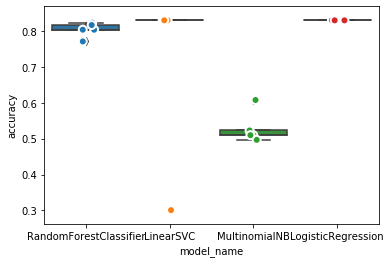

In [129]:
#cross validationscore graph for better evaluation of the model

from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

models = [RandomForestClassifier(random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0, solver='liblinear'),]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_test1, y_test1, scoring='accuracy', cv=CV)
    for fid, accuracy in enumerate(accuracies):
        entries.append((model_name, fid, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fid', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="white", linewidth=2)
plt.show()